In [1]:
import pandas as pd
import seaborn as sb
import json

In [38]:
dfBeersReview = pd.read_csv("beer_reviews.csv")
dfBeersRecipe = pd.read_csv("recipeData.csv")

In [39]:
dfBeersReview.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [40]:
dfBeersRecipe.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [41]:
dfBeersReview = dfBeersReview.drop(columns=["brewery_id", "review_time", "review_profilename", "beer_beerid"])
dfBeersReview.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [42]:
dfBeersRecipe = dfBeersRecipe.drop(columns=["URL", "BeerID", "Style", "StyleID", "Size(L)", "MashThickness", "SugarScale", "BrewMethod", "PitchRate", "PrimaryTemp", "PrimingMethod", "PrimingAmount", "UserId", "BoilGravity"])
dfBeersRecipe.head()

,Name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Vanilla Cream Ale,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0
1,Southern Tier Pumking clone,1.083,1.021,8.16,60.65,15.64,24.61,60,70.0
2,Zombie Dust Clone - EXTRACT,1.063,1.018,5.91,59.25,8.98,22.71,60,70.0
3,Zombie Dust Clone - ALL GRAIN,1.061,1.017,5.80,54.48,8.50,26.50,60,70.0
4,Bakke Brygg Belgisk Blonde 50 l,1.060,1.010,6.48,17.84,4.57,60.00,90,72.0


In [43]:
dfBeersRecipe = dfBeersRecipe.rename(columns={'Name': 'beer_name'})
dfBeersRecipe.head()

,beer_name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Vanilla Cream Ale,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0
1,Southern Tier Pumking clone,1.083,1.021,8.16,60.65,15.64,24.61,60,70.0
2,Zombie Dust Clone - EXTRACT,1.063,1.018,5.91,59.25,8.98,22.71,60,70.0
3,Zombie Dust Clone - ALL GRAIN,1.061,1.017,5.80,54.48,8.50,26.50,60,70.0
4,Bakke Brygg Belgisk Blonde 50 l,1.060,1.010,6.48,17.84,4.57,60.00,90,72.0


In [37]:
#dfBeersReview[dfBeersReview['review_overall'].isnull()]
#dfBeersReview[dfBeersReview['review_aroma'].isnull()]
#dfBeersReview[dfBeersReview['review_appearance'].isnull()]
#dfBeersReview[dfBeersReview['review_palate'].isnull()]
#dfBeersReview[dfBeersReview['review_taste'].isnull()]
dfBeersReview[dfBeersReview['beer_abv'].isnull()]
#dfBeersReview[dfBeersReview['beer_name'].isnull()]
#dfBeersReview[dfBeersReview['beer_style'].isnull()]

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
273,Caldera Brewing Company,3.0,3.0,3.0,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN
430,Moon River Brewing Company,3.5,4.0,4.5,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN
603,Moon River Brewing Company,4.0,3.5,4.0,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN
733,Caldera Brewing Company,4.0,4.0,4.0,American IPA,4.0,4.0,Alpha Beta,NaN
798,Caldera Brewing Company,4.5,4.5,4.0,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN
...,...,...,...,...,...,...,...,...,...
1586568,The Defiant Brewing Company,4.0,3.5,4.0,Bock,4.0,4.0,Bock,NaN
1586587,The Defiant Brewing Company,3.5,4.5,4.0,Maibock / Helles Bock,4.5,4.0,Maibock,NaN
1586596,The Defiant Brewing Company,4.0,3.0,5.0,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN
1586597,The Defiant Brewing Company,4.5,4.5,4.0,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN


In [52]:
dfBeersRecipe[dfBeersRecipe['beer_name'].isnull()]

,beer_name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
28051,NaN,1.002,1.001,0.22,0.0,0.53,22.71,60,70.0


In [56]:
dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]

<ipython-input-56-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]
<ipython-input-56-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]
<ipython-input-56-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersRecipe[dfBeersRecipe['OG']>1.000][dfBeersRecipe['OG']<1.003][dfBeersRecipe['FG']>=1.000][dfBeersRecipe['FG']<=1.002][dfBeersRecipe['ABV']>=0.20][dfBeersRecipe['ABV']<=0.24]
<ipython-input-56-480f56e31ab5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfBeersR

,beer_name,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
28051,NaN,1.002,1.001,0.22,0.00,0.53,22.71,60,70.0
38632,Punkinhead Wheat,1.002,1.001,0.21,19.79,1.18,27.44,60,65.0
42917,Spice Cookie Stout,1.002,1.001,0.21,0.00,0.80,28.39,60,35.0
62507,Test Custom Mashable,1.002,1.001,0.21,0.00,2.97,28.39,60,70.0


In [57]:
dfBeersRecipe =  dfBeersRecipe.groupby('beer_name').mean()
dfBeersRecipe

,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,
\tImperial Nut Brown Maple Chai,1.1070,1.01900,11.55,70.57,30.85,28.39,60.0,65.0
\tMaple Brown Ale,1.0730,1.01800,7.23,53.85,22.36,30.28,60.0,75.0
\tTempe Closet Oatmeal Milk Brown,16.4312,7.03775,5.17,25.86,21.16,26.50,90.0,70.0
!!! Citra Pale !!!,1.0660,1.01700,6.50,60.52,7.13,47.32,60.0,75.0
!!! IPA !!!,1.0760,1.01900,7.50,72.36,10.48,47.32,90.0,75.0
...,...,...,...,...,...,...,...,...
�vralids old oak,1.0720,1.02000,6.82,35.88,15.07,16.00,60.0,70.0
�vslapps�l,1.0690,1.01900,6.56,73.46,9.24,13.00,60.0,70.0
�yvind porter,1.0950,1.01800,10.12,45.67,39.38,31.00,60.0,85.0


In [58]:
beersReviewANDRecipe = pd.merge(dfBeersReview,dfBeersRecipe,on = "beer_name")
beersReviewANDRecipe

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
0,Broad Ripple Brew Pub,4.0,3.5,4.0,English Brown Ale,3.5,3.5,Nut Brown,4.7,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,NaN,1.051,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,The Defiant Brewing Company,4.0,4.0,3.5,American IPA,4.5,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205698,The Defiant Brewing Company,4.5,4.0,4.0,American IPA,4.0,4.5,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205699,The Defiant Brewing Company,4.0,4.0,4.5,American IPA,4.0,4.0,Medusa IPA,6.5,1.062,1.012500,6.530000,63.705000,9.460000,55.835000,60.000000,72.500000
205700,The Defiant Brewing Company,4.5,5.0,5.0,Russian Imperial Stout,4.5,4.5,Death,15.0,1.085,1.018000,8.800000,44.790000,8.870000,24.610000,60.000000,70.000000


In [69]:
for el in beersReviewANDRecipe[["beer_name","beer_abv", "ABV"]]:
    print(el)
    if(el["beer_abv"] == None):
        el["beer_abv"] = beersReviewANDRecipe[beersReviewANDRecipe[el["beer_name"]]['ABV']]

beer_name


TypeError: string indices must be integers

In [72]:
beersReviewANDRecipe["beer_abv"] = beersReviewANDRecipe["ABV"]

In [61]:
beersReviewANDRecipe[beersReviewANDRecipe['beer_abv'].isnull()]

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.0510,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,NaN,1.0510,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,NaN,1.0510,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,NaN,1.0510,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
5,District ChopHouse & Brewery,4.5,4.5,4.5,English Brown Ale,4.5,2.5,Nut Brown,NaN,1.0510,1.012636,5.031818,27.233636,20.935455,21.093636,57.727273,57.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204080,Bill's Tavern & Brewhouse,3.5,3.0,3.5,Rye Beer,3.5,3.5,Golden Rye,NaN,1.0610,1.014000,6.140000,65.010000,12.260000,24.610000,60.000000,70.000000
205570,Kimo's Sports Bar,4.0,4.0,4.0,American Pale Ale (APA),4.0,3.5,Fresh Hopped Pale Ale,NaN,1.0480,1.013000,4.540000,41.410000,8.030000,9.460000,60.000000,35.000000
205571,Kimo's Sports Bar,4.0,4.5,4.0,American Pale Ale (APA),4.0,4.5,Fresh Hopped Pale Ale,NaN,1.0480,1.013000,4.540000,41.410000,8.030000,9.460000,60.000000,35.000000
205667,Eagle Rock Brewery,3.5,3.5,4.0,Saison / Farmhouse Ale,4.0,3.5,Ginger Saison,NaN,1.0575,1.011250,6.072500,21.327500,4.690000,34.625000,62.500000,70.250000


In [74]:
beersReviewANDRecipe[beersReviewANDRecipe['beer_abv'].isnull()]

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency


In [75]:
beersReviewANDRecipe = beersReviewANDRecipe.drop(columns=["ABV"])
beersReviewANDRecipe.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
0,Broad Ripple Brew Pub,4.0,3.5,4.0,English Brown Ale,3.5,3.5,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
1,District ChopHouse & Brewery,4.0,4.0,4.0,English Brown Ale,4.0,4.0,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
2,District ChopHouse & Brewery,4.0,3.0,3.5,English Brown Ale,4.0,4.0,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
3,District ChopHouse & Brewery,3.0,2.5,3.5,English Brown Ale,3.0,3.5,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909
4,District ChopHouse & Brewery,3.5,3.0,3.5,English Brown Ale,3.5,3.0,Nut Brown,5.031818,1.051,1.012636,27.233636,20.935455,21.093636,57.727273,57.090909


In [77]:
beersByName =  beersReviewANDRecipe.groupby('beer_name').mean()
beersByName

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
beer_name,,,,,,,,,,,,,
#14,3.857143,3.785714,3.857143,3.714286,3.785714,6.015000,7.305500,1.90087,58.485000,7.425000,23.100000,65.000000,67.000000
#9,3.539528,3.434466,3.501040,3.398058,3.396671,5.380000,13.099200,3.06868,28.960000,47.970000,28.000000,60.000000,70.000000
'Tis The Saison,3.750000,3.250000,2.500000,4.000000,3.750000,4.890000,1.048000,1.01100,25.390000,7.690000,24.610000,60.000000,70.000000
4x4,4.000000,3.500000,3.666667,3.666667,3.833333,5.520000,1.058000,1.01600,63.340000,32.500000,25.000000,90.000000,83.000000
60 Minute IPA,4.172727,3.996768,3.966061,4.006667,4.118990,6.210000,1.058000,1.01100,65.700000,3.510000,22.000000,60.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yule,3.500000,4.000000,4.000000,3.000000,4.000000,7.520000,1.071000,1.01300,54.700000,19.650000,11.360000,60.000000,80.000000
Yuletide Ale,3.923077,3.576923,3.769231,3.653846,3.730769,7.540000,1.077000,1.01900,20.590000,17.480000,6.000000,60.000000,35.000000
Zombie Dust,4.512723,4.543257,4.215013,4.258270,4.492366,6.233478,1.063565,1.01600,63.047391,8.803478,27.713913,63.913043,68.043478


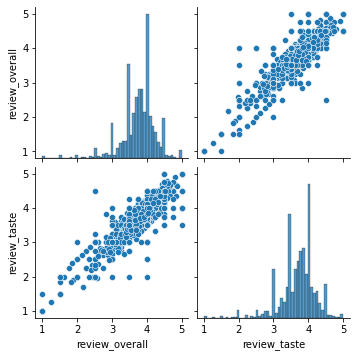

In [81]:
col = ["review_overall", "review_taste"]
g = sb.pairplot(
    data=beersByName[col]
)

<AxesSubplot:>

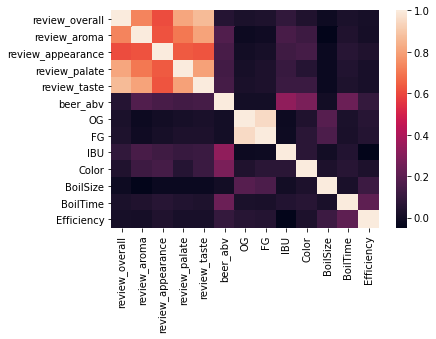

In [82]:
sb.heatmap(beersByName.corr())

In [83]:
beersByName.corr()["review_overall"].sort_values(ascending=False)

review_overall       1.000000
review_taste         0.867247
review_palate        0.814251
review_aroma         0.731748
review_appearance    0.609474
IBU                  0.086274
beer_abv             0.054998
Color                0.037074
FG                   0.035013
OG                   0.027845
BoilTime             0.024821
Efficiency           0.015177
BoilSize            -0.008599
Name: review_overall, dtype: float64

In [94]:
beersByName.corr()["IBU"].sort_values(ascending=False)


IBU                  1.000000
beer_abv             0.328515
review_aroma         0.150086
review_appearance    0.126374
review_taste         0.114800
review_palate        0.105020
review_overall       0.086274
Color                0.068201
BoilTime             0.045874
BoilSize             0.002037
level_0             -0.009003
index               -0.009003
FG                  -0.009389
OG                  -0.013387
Efficiency          -0.045924
Name: IBU, dtype: float64

In [93]:
#beersByName = beersByName.reset_index()
beersByName.sort_values(by="beer_abv", ascending=False)[["beer_name", "beer_abv"]].head(10)

,beer_name,beer_abv
1221,Maximus,20.44
1848,Tokyo,18.26
278,Black Tokyo Horizon,17.46
168,Belgian Barley Wine,16.08
1128,Kasteel Donker,12.18
1891,V,12.01
1477,Quilter's Irish Death,11.95
770,Fireside,11.89
146,Baronen,11.82
692,Eisbock,11.82


In [95]:
beersByb =  beersReviewANDRecipe.groupby('brewery_name').mean()
beersByb

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,OG,FG,IBU,Color,BoilSize,BoilTime,Efficiency
brewery_name,,,,,,,,,,,,,
10 Barrel Brewing Co.,4.000000,3.000000,3.000000,3.500000,3.500000,5.060000,1.050175,1.011625,33.354000,5.803500,26.422250,67.125000,64.050000
1516 Brewing Company,4.000000,3.666667,4.000000,3.500000,3.666667,5.138554,1.104468,1.022803,41.122678,9.418650,44.117037,61.157407,66.817415
16 Mile Brewing Company,4.200000,4.200000,4.100000,3.900000,4.200000,6.610000,1.060000,1.010000,65.790000,4.600000,37.000000,60.000000,70.000000
1702 / The Address Brewing Co.,4.000000,4.500000,4.000000,4.000000,4.000000,7.315000,1.071000,1.015000,88.530000,8.795000,58.200000,75.000000,69.000000
1st City Brewery and Grill,4.500000,4.250000,4.500000,4.500000,4.500000,5.518136,1.057653,1.015644,35.384153,35.719915,46.428644,63.728814,67.377119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zum Stiefel,3.500000,3.000000,3.166667,3.333333,3.166667,5.191190,1.537658,1.109005,18.270952,4.784460,116.747095,70.317460,69.842857
À l’abri de la Tempête,3.400000,3.300000,3.000000,3.400000,3.400000,5.290000,1.050000,1.010000,30.910000,2.720000,9.460000,60.000000,35.000000
Ægir Bryggeri,4.000000,4.500000,4.000000,4.000000,4.000000,6.610000,1.060000,1.010000,65.790000,4.600000,37.000000,60.000000,70.000000


In [96]:
beersByb = beersByb.reset_index()
beersByb.sort_values(by="review_overall", ascending=False)[["brewery_name", "review_overall"]].head(10)

,brewery_name,review_overall
248,Boston Breweries,5.0
506,Coach's Brewhouse,5.0
1077,Kunino Cho,5.0
1469,Pipkin Brewery,5.0
1796,TBonz Gill & Grill,5.0
1648,"Sekinoichi-shuzou, Iwate-kura Brewery",5.0
2039,Wild Creek Brewing Company,5.0
204,Black Lotus Brewery,5.0
188,Binghams Brewery,5.0
500,Clay Pipe Brewing Company,5.0


In [ ]:
with open('recipes_full.txt') as f:
    dfBeersRecipe = pd.DataFrame(json.loads(f.read()))
dfBeersRecipe = dfBeersRecipe.transpose()

In [72]:
dfBeersRecipe[dfBeersRecipe['style'].isnull()]

,name,url,method,style,batch,og,fg,abv,ibu,color,ph mash,fermentables,hops,hops Summary,other,yeast,rating,num rating,views


In [6]:
dfBeersRecipe = dfBeersRecipe.drop(columns=["views", "num rating", "rating"])

In [7]:
dfBeersRecipe.head()

,name,url,method,style,batch,og,fg,abv,ibu,color,ph mash,fermentables,hops,hops Summary,other,yeast
0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,All Grain,Cream Ale,21.8,1.055,1.013,5.48,19.44,4.83,-1,"[[2.381, American - Pale 2-Row, 37.0, 1.8, 44....","[[14.0, Cascade, Pellet, 6.2, Boil, 60 min, 11...","[[28.0, Cascade (Pellet), 18.34, 66.6], [14.0,...","[[2 oz, pure vanilla extract, Flavor, Boil, 0 ...","[Wyeast - Kölsch 2565, 76%, Low, 56, 70, Yes]"
1,Avg. Perfect Northeast IPA (NEIPA),/homebrew/recipe/view/363082/avg-perfect-north...,All Grain,Specialty IPA: New England IPA,21.8,1.062,1.013,6.5,59.26,5.2,5.49,"[[4.876, American - Pale 2-Row, 37.0, 1.8, 77....","[[28.0, Citra, Pellet, 12.6, Boil, 10 min, 13....","[[133.0, Citra (Pellet), 22.78, 34.6], [154.0,...","[[0.50 tsp, Irish Moss, Fining, Boil, 15 min.]...","[Wyeast - London Ale III 1318, 78%, High, 64, ..."
2,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,All Grain,American Pale Ale,24.6,1.055,1.013,5.58,39.79,8.0,5.67,"[[5.216, American - Pale 2-Row, 37.0, 1.8, 92....","[[14.0, Magnum, Pellet, 15.0, Boil, 60 min, 22...","[[14.0, Magnum (Pellet), 22.62, 8.3], [14.0, P...","[[1 each, Crush whilrfoc Tablet, Water Agt, Bo...",[Fermentis - Safale - American Ale Yeast US-05...
3,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,All Grain,American IPA,22.7,1.061,1.016,5.94,62.42,8.5,5.81,"[[5.33, American - Pale 2-Row, 37.0, 1.8, 81.7...","[[21.0, Citra, Pellet, 11.0, First Wort, 0 min...","[[245.0, Citra (Pellet), 62.42, 100.1]]",[],"[Fermentis - Safale - English Ale Yeast S-04, ..."
4,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,All Grain,Imperial IPA,22.7,1.072,1.018,7.09,232.89,6.33,-1,"[[6.01, American - Pale 2-Row, 37.0, 1.8, 87.2...","[[98.0, Columbus, Pellet, 15.0, Boil, 90 min, ...","[[154.0, Columbus (Pellet), 203.08, 44.0], [13...",[],"[Wyeast - American Ale 1056, 75%, Med-Low, 60,..."


In [8]:
dfBeersRecipe = dfBeersRecipe.rename(columns={'name': 'beer_name'})
dfBeersRecipe2 = dfBeersRecipe2.rename(columns={'Name': 'beer_name'})

In [73]:
dfBeersRecipe2 = dfBeersRecipe2.drop_duplicates(subset=['beer_name'])
dfBeersRecipe = dfBeersRecipe.drop_duplicates(subset=['beer_name'])

In [91]:
beersReviewANDRecipe = pd.merge(dfBeersReview,dfBeersRecipe2,on = "beer_name")

In [92]:
beersReviewANDRecipe

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1454,Broad Ripple Brew Pub,1262208997,4.0,3.5,4.0,JamesS,English Brown Ale,3.5,3.5,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
1,742,District ChopHouse & Brewery,1140322128,4.0,4.0,4.0,Dithyramb,English Brown Ale,4.0,4.0,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
2,742,District ChopHouse & Brewery,1109002280,4.0,3.0,3.5,Gavage,English Brown Ale,4.0,4.0,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
3,742,District ChopHouse & Brewery,1143515639,3.0,2.5,3.5,pbr85,English Brown Ale,3.0,3.5,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,742,District ChopHouse & Brewery,1289348763,3.5,3.0,3.5,Thorpe429,English Brown Ale,3.5,3.0,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,14359,The Defiant Brewing Company,1283897086,4.0,4.0,3.5,cavedave,American IPA,4.5,4.0,...,1.044,75.0,NaN,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,51433.0
205698,14359,The Defiant Brewing Company,1283049560,4.5,4.0,4.0,koopa,American IPA,4.0,4.5,...,1.044,75.0,NaN,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,51433.0
205699,14359,The Defiant Brewing Company,1266287032,4.0,4.0,4.5,Billolick,American IPA,4.0,4.0,...,1.044,75.0,NaN,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,51433.0
205700,14359,The Defiant Brewing Company,1272196096,4.5,5.0,5.0,gregc,Russian Imperial Stout,4.5,4.5,...,1.065,70.0,1.3,Specific Gravity,All Grain,0.75,18.33,NaN,NaN,NaN


In [93]:
beersReviewANDRecipeMain = beersReviewANDRecipe.drop(columns=["brewery_id"])

In [94]:
beersReviewANDRecipeMain

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,Broad Ripple Brew Pub,1262208997,4.0,3.5,4.0,JamesS,English Brown Ale,3.5,3.5,Nut Brown,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
1,District ChopHouse & Brewery,1140322128,4.0,4.0,4.0,Dithyramb,English Brown Ale,4.0,4.0,Nut Brown,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
2,District ChopHouse & Brewery,1109002280,4.0,3.0,3.5,Gavage,English Brown Ale,4.0,4.0,Nut Brown,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
3,District ChopHouse & Brewery,1143515639,3.0,2.5,3.5,pbr85,English Brown Ale,3.0,3.5,Nut Brown,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,District ChopHouse & Brewery,1289348763,3.5,3.0,3.5,Thorpe429,English Brown Ale,3.5,3.0,Nut Brown,...,1.041,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,The Defiant Brewing Company,1283897086,4.0,4.0,3.5,cavedave,American IPA,4.5,4.0,Medusa IPA,...,1.044,75.0,NaN,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,51433.0
205698,The Defiant Brewing Company,1283049560,4.5,4.0,4.0,koopa,American IPA,4.0,4.5,Medusa IPA,...,1.044,75.0,NaN,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,51433.0
205699,The Defiant Brewing Company,1266287032,4.0,4.0,4.5,Billolick,American IPA,4.0,4.0,Medusa IPA,...,1.044,75.0,NaN,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,51433.0
205700,The Defiant Brewing Company,1272196096,4.5,5.0,5.0,gregc,Russian Imperial Stout,4.5,4.5,Death,...,1.065,70.0,1.3,Specific Gravity,All Grain,0.75,18.33,NaN,NaN,NaN


In [95]:
beersByName =  beersReviewANDRecipeMain.groupby('beer_name').mean()

In [96]:
beersByName.size

48456

In [97]:
beersByName

,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,BeerID,StyleID,...,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
beer_name,,,,,,,,,,,,,,,,,,,,,
#14,1.250541e+09,3.857143,3.785714,3.857143,3.714286,3.785714,8.0,50822.00000,20556.0,7.0,...,50.36,6.79,25.00,60.0,10.900,70.0,3.0,0.35,20.00,45417.0
#9,1.215286e+09,3.539528,3.434466,3.501040,3.398058,3.396671,5.1,299.00000,20598.0,114.0,...,28.96,47.97,28.00,60.0,10.800,70.0,3.0,0.35,20.00,45417.0
'Tis The Saison,1.305207e+09,3.750000,3.250000,2.500000,4.000000,3.750000,6.0,68145.00000,1936.0,134.0,...,25.39,7.69,24.61,60.0,NaN,70.0,NaN,NaN,NaN,8363.0
4x4,1.152065e+09,4.000000,3.500000,3.666667,3.666667,3.833333,5.0,22088.00000,14010.0,148.0,...,63.34,32.50,25.00,90.0,1.070,83.0,NaN,0.75,19.00,NaN
60 Minute IPA,1.211022e+09,4.172727,3.996768,3.966061,4.006667,4.118990,6.0,6108.00000,69535.0,7.0,...,65.70,3.51,22.00,60.0,1.048,35.0,NaN,NaN,18.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yule,1.230411e+09,3.500000,4.000000,4.000000,3.000000,4.000000,8.0,46855.00000,34742.0,174.0,...,54.70,19.65,11.36,60.0,1.118,80.0,NaN,NaN,NaN,NaN
Yuletide Ale,1.067704e+09,3.923077,3.576923,3.769231,3.653846,3.730769,NaN,7346.00000,34690.0,168.0,...,20.59,17.48,6.00,60.0,1.192,35.0,NaN,NaN,23.00,17026.0
Zombie Dust,1.314489e+09,4.512723,4.543257,4.215013,4.258270,4.492366,6.2,64228.00000,1596.0,10.0,...,52.99,9.50,11.36,60.0,NaN,70.0,NaN,NaN,16.67,NaN


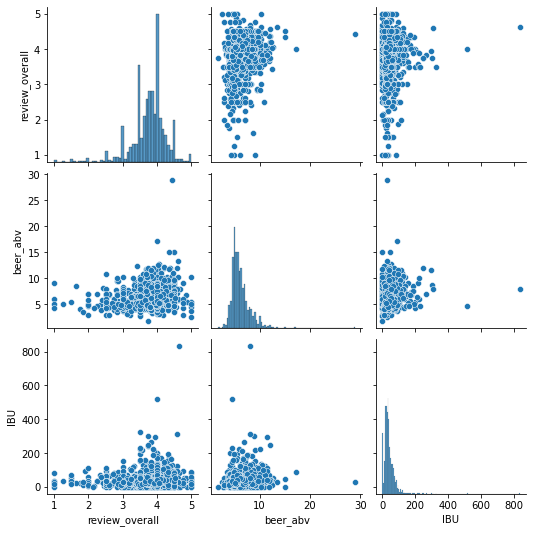

In [99]:
col = ["review_overall", "beer_abv","IBU"]
g = sb.pairplot(
    data=beersByName[col]
)

In [100]:
beersByRate =  beersByName.groupby('review_overall').mean()

In [101]:
beersByRate

,review_time,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,BeerID,StyleID,Size(L),...,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
review_overall,,,,,,,,,,,,,,,,,,,,,
1.000000,1.241904e+09,1.600000,2.466667,1.600000,1.100000,6.100,53361.200000,30054.400000,65.600000,23.906000,...,32.718000,8.922000,32.720000,66.000000,1.038250,71.100000,1.415000,0.4250,20.555000,22349.5
1.250000,1.129820e+09,2.500000,3.500000,2.500000,1.250000,5.000,26467.500000,47993.000000,45.000000,23.090000,...,31.860000,6.270000,30.660000,60.000000,1.035000,70.000000,1.400000,NaN,17.220000,NaN
1.500000,1.139964e+09,1.916667,2.214286,1.738095,1.690476,5.500,23963.285714,31038.000000,49.428571,27.632857,...,36.411429,14.342857,32.018571,64.285714,1.054857,70.714286,2.333333,0.7600,18.444000,57573.0
1.625000,1.239894e+09,1.750000,2.875000,2.375000,2.000000,8.600,24325.000000,32072.000000,10.000000,59.620000,...,25.380000,10.880000,67.190000,90.000000,1.056000,75.000000,1.500000,1.0000,20.000000,47996.0
1.750000,1.085455e+09,2.250000,3.000000,2.500000,2.250000,4.000,10622.000000,43076.000000,15.000000,3.790000,...,23.080000,5.270000,10.410000,60.000000,1.022000,65.000000,1.250000,0.3500,18.330000,20648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.750000,1.235552e+09,4.339286,4.089286,4.208333,4.321429,5.460,50635.428571,25056.142857,58.714286,295.928571,...,33.455714,6.441429,306.520000,68.571429,1.053429,66.714286,2.750000,0.5500,17.110000,60505.0
4.800000,1.081657e+09,5.000000,4.300000,4.400000,4.900000,6.000,16849.000000,2438.000000,132.000000,30.000000,...,53.830000,31.580000,40.000000,60.000000,1.061000,70.000000,2.500000,NaN,22.000000,14759.0
4.833333,1.183886e+09,4.416667,4.333333,4.500000,4.500000,6.700,40260.000000,24569.500000,61.500000,11.360000,...,46.520000,13.820000,12.680000,60.000000,1.051000,70.000000,NaN,0.6750,20.000000,39480.0


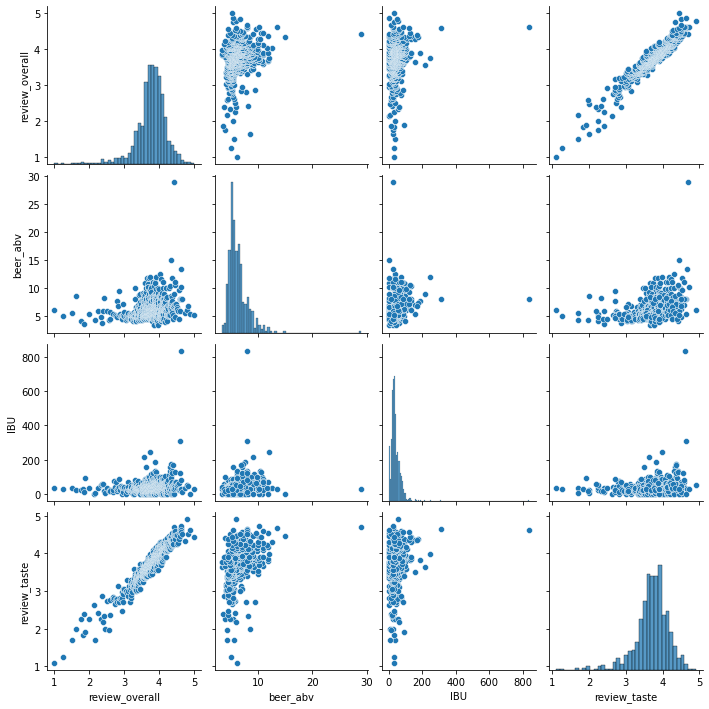

In [102]:
beersByRate = beersByRate.reset_index()
col = ["review_overall", "beer_abv", "IBU", "review_taste"]
g = sb.pairplot(
    data=beersByRate[col]
)

<AxesSubplot:>

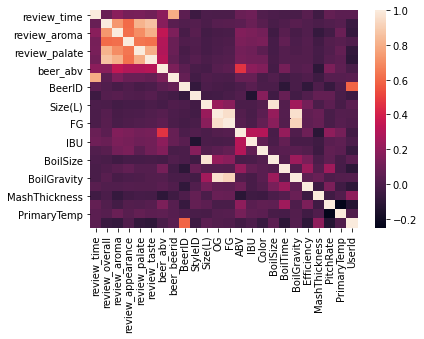

In [105]:
sb.heatmap(beersByName.corr())

In [111]:

beersByName.corr()["review_overall"].sort_values(ascending=False)І

review_overall       1.000000
review_taste         0.867247
review_palate        0.814251
review_aroma         0.731748
review_appearance    0.609474
beer_abv             0.176895
IBU                  0.085940
review_time          0.084882
ABV                  0.045332
beer_beerid          0.037316
BoilGravity          0.034299
Color                0.033631
FG                   0.032273
PrimaryTemp          0.031841
OG                   0.027894
StyleID              0.024861
Efficiency           0.014109
PitchRate            0.013673
BeerID               0.012607
BoilTime             0.011593
MashThickness       -0.003683
Size(L)             -0.004485
BoilSize            -0.011615
UserId              -0.056293
Name: review_overall, dtype: float64